Data: http://scipy-lectures.org/_downloads/populations.txt

Plot the populations for the years in the period. Add legend and axis labels to the plot.

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


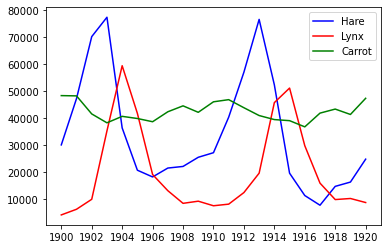

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
print(data)


years = data[:, 0]

x = np.arange(np.min(years), np.max(years)+1, 2) 

plt.plot(years, data[:, 1], color = 'blue', label = 'Hare')
plt.plot(years, data[:, 2], color = 'red', label = 'Lynx')
plt.plot(years, data[:, 3], color = 'green', label = 'Carrot')

plt.legend()
plt.xticks(x)
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

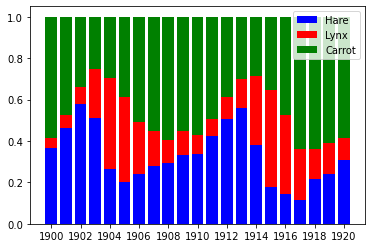

In [5]:
norma = np.sum(data[:, 1:4], axis = 1)

plt.bar(years, data[:, 1] / norma, color = 'blue', label = 'Hare')
plt.bar(years, data[:, 2] / norma, color = 'red', label = 'Lynx', bottom = data[:, 1] / norma)
plt.bar(years, data[:, 3] / norma, color = 'green', label = 'Carrot', bottom = (data[:, 2] + data[:, 1]) / norma)

plt.legend()
plt.xticks(x)
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

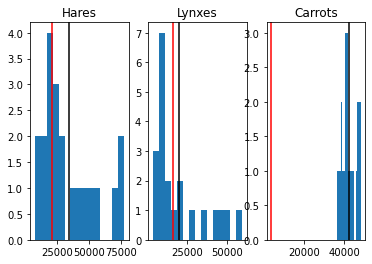

In [44]:
fig, ax = plt.subplots(1, 3)


ax[0].set(title = 'Hares')
ax[0].hist(data[:, 1], bins = 15)
ax[0].axvline(data[:, 1].mean(), c = 'black')
ax[0].axvline(data[:, 1].std(), c = 'r')


ax[1].set(title = 'Lynxes')
ax[1].hist(data[:, 2], bins = 15)
ax[1].axvline(data[:, 2].mean(), c = 'black')
ax[1].axvline(data[:, 2].std(), c = 'r')


ax[2].set(title = 'Carrots')
ax[2].hist(data[:, 3], bins = 15)
ax[2].axvline(data[:, 3].mean(), c = 'black')
ax[2].axvline(data[:, 3].std(), c = 'r')


plt.show() 

Find which year each species had the largest population. Mark these years in the plot of populations.

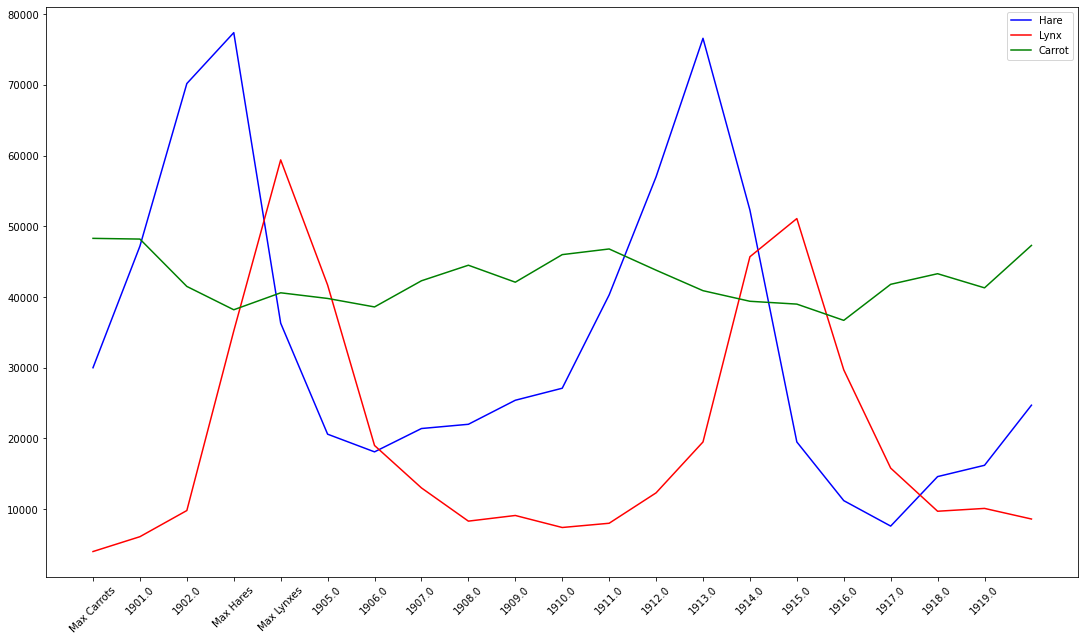

In [10]:
#import sys
#from termcolor import colored
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np 


def update_ticks(x, pos):
    if pos == np.argmax(data[:, 1]):
#        text = colored('%d' %data[pos, 1], 'blue')
        return 'Max Hares'
    if pos == np.argmax(data[:, 2]):
#        text = colored('%d' %data[pos, 2], 'red')
        return 'Max Lynxes'
    if pos == np.argmax(data[:, 3]):
#        text = colored('%d' %data[pos, 3], 'green')
        return 'Max Carrots'
    else:
        return x

data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

fig, ax = plt.subplots()
x = np.arange(np.min(years), np.max(years)) 
years = data[:, 0]

plt.plot(years, data[:, 1], color = 'blue', label = 'Hare')
plt.plot(years, data[:, 2], color = 'red', label = 'Lynx')
plt.plot(years, data[:, 3], color = 'green', label = 'Carrot')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
fig.set_size_inches(18.5, 10.5, forward=True)
plt.legend()
plt.xticks(x, rotation=45)
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


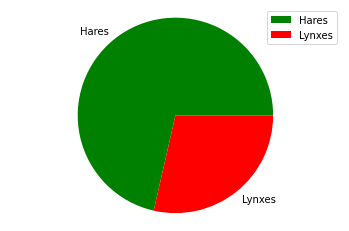

In [200]:
def rename(x):
    for i in range(len(x)):
        if (x[i] == 0):
            x[i] = 'H'
        if (x[i] == 1):
            x[i] = 'L'
    return x

data1 = data[:, (1,2)]

k = np.argmax(data1, axis = 1)
k = list(k)
H = k.count(0)
L = k.count(1)
plt.pie([H, L], labels = ['Hares','Lynxes'], colors = ['green', 'red'])

print(rename(k))

plt.axis('equal')
plt.legend()
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

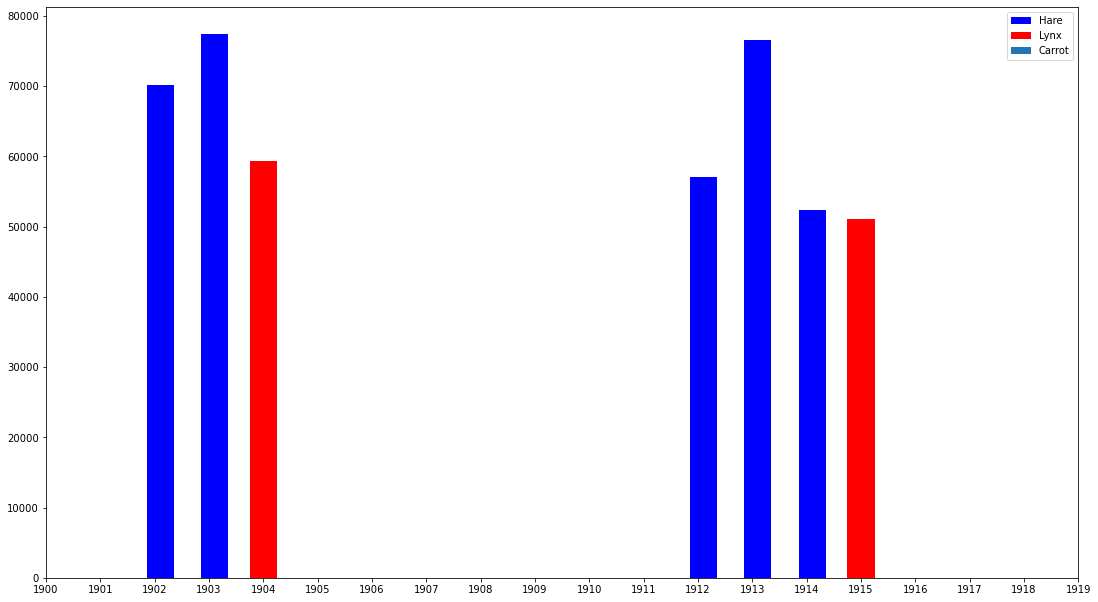

In [201]:
fig, ax = plt.subplots()

hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]
maskH = hares > 50000
maskL = lynxes > 50000
maskC = carrots > 50000

x = np.arange(np.min(years), np.max(years))

plt.bar(years[maskH] + 0.1, hares[maskH], width = 0.5, color = 'blue', label = 'Hare')
plt.bar(years[maskL], lynxes[maskL], width = 0.5, color = 'red', label = 'Lynx')
plt.bar(years[maskC] - 0.1, carrots[maskC], color = 'green', label = 'Carrot')


fig.set_size_inches(18.5, 10.5, forward=True)
plt.legend()
plt.xticks(x)
plt.show()

Find the top 2 years for each species when they had the lowest populations.

In [114]:
resH = np.argsort(hares)
print("top 2 years with lowest populations of hares : {} {}".format(int( years[resH[0]] ), int( years[resH[1]] ) ) ) 

resL = np.argsort(lynxes)
print("top 2 years with lowest populations of lynxes : {} {}".format(int( years[resL[0]] ), int( years[resL[1]] ) ) ) 

resC = np.argsort(carrots)
print("top 2 years with lowest populations of carrots : {} {}".format(int( years[resC[0]] ), int( years[resC[1]] ) ) ) 

top 2 years with lowest populations of hares : 1917 1916
top 2 years with lowest populations of lynxes : 1900 1901
top 2 years with lowest populations of carrots : 1916 1903


Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

Correlation coefficient = 0.07189206073535571


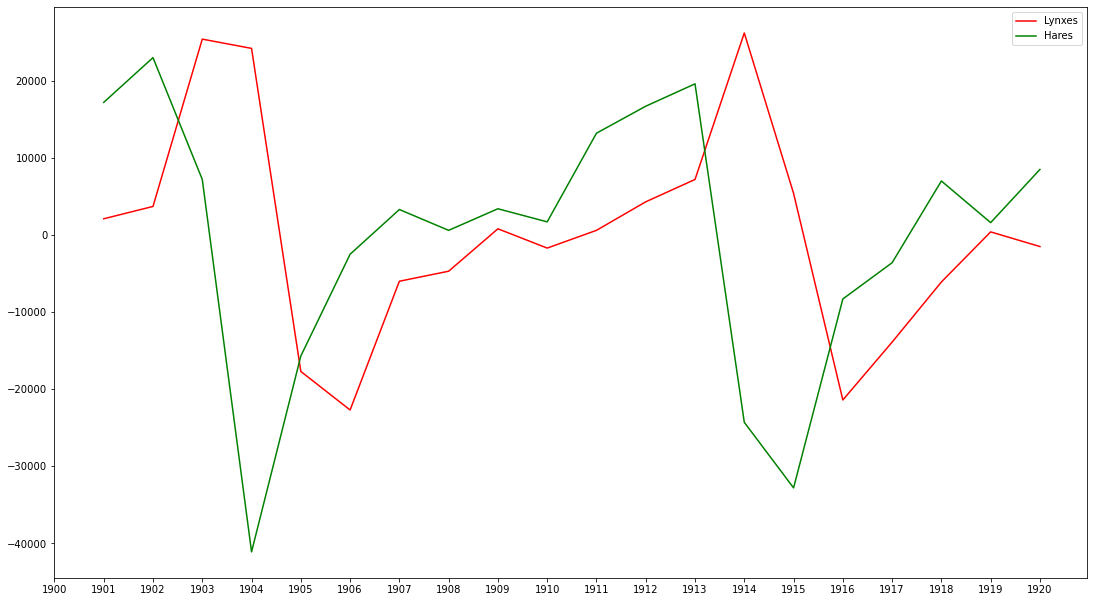

In [215]:
import pandas as pd


x = np.arange(np.min(years), np.max(years) + 1)

fig, ax = plt.subplots()

difL = lynxes[1:] - lynxes[:20]
difH = hares[1:] - hares[:20]
#difC = carrots[1:] - carrots[:20]

plt.plot(years[1:], difL, color = 'r', label = 'Lynxes')
plt.plot(years[1:], difH, color = 'g', label = 'Hares')
#plt.plot(years[1:], difC, color = 'b', label = 'Carrots')

df = pd.DataFrame(data[:, (1,2)], columns=list('AB'))
print("Correlation coefficient = {}".format(df.A.corr(df.B)))

fig.set_size_inches(18.5, 10.5, forward=True)
plt.legend()
plt.xticks(x)
plt.show()

Show population of hares vs carrots and hares vs lynxes.

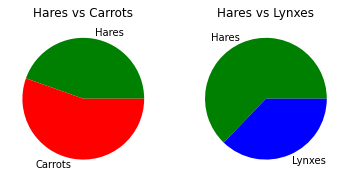

In [155]:
fig, ax = plt.subplots(1, 2)


sumH = np.sum(hares)
sumL = np.sum(lynxes)
sumC = np.sum(carrots)

ax[0].set(title = 'Hares vs Carrots')
ax[0].pie([sumH, sumC], labels = ['Hares','Carrots'], colors = ['green', 'red'])


ax[1].set(title = 'Hares vs Lynxes')
ax[1].pie([sumH, sumL], labels = ['Hares','Lynxes'], colors = ['green', 'blue'])

plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

Error of prediction = 16.599190283400812%


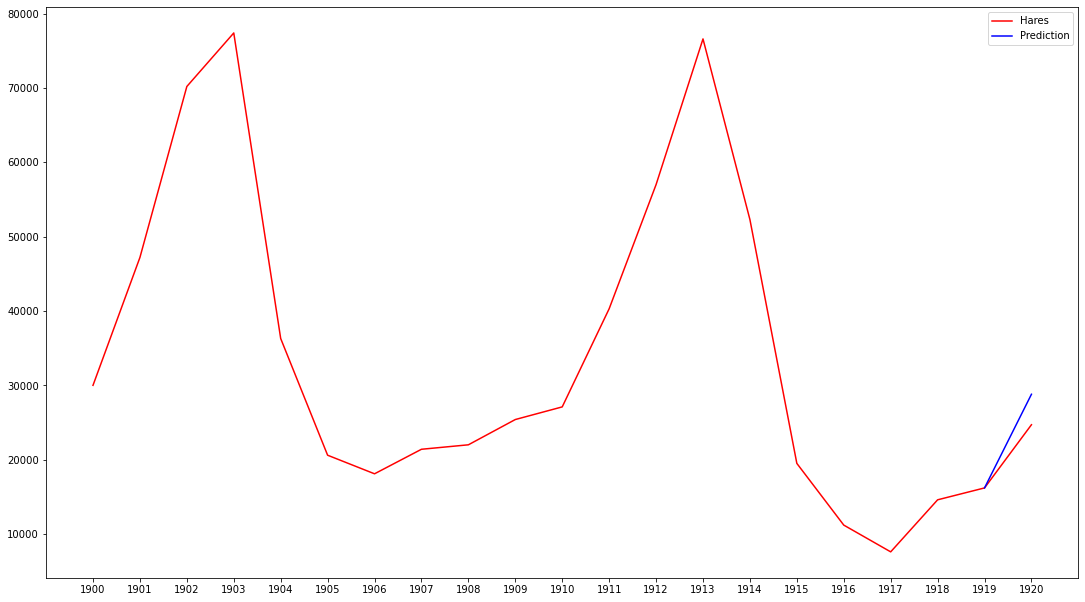

In [224]:
def sgn_coef(x):
    if (x > 0):
        return -0.5
    if (x == 0):
        return 0.1
    if (x < 0):
        return 1.5

def prediction(hares, lynxes, m):
    c = 1.5
    n = len(lynxes) - 1
    difL = lynxes[1:] - lynxes[:n]
    dif = abs(difL[m-3] - difL[m-2]) + abs(difL[m-2] - difL[m-1])
    res = hares[m-1] + sgn_coef(difL[m - 1] - difL[m - 2])*dif 
    return res

fig, ax = plt.subplots()
plt.plot(years, hares, color = 'r', label = 'Hares')
plt.plot(years[19:], [hares[19], prediction(hares, lynxes, 20)], color = 'blue', label = 'Prediction')

print("Error of prediction = {}%".format( float((abs(prediction(hares, lynxes, 20)) - hares[20]) / hares[20] )*100) )
fig.set_size_inches(18.5, 10.5, forward=True)
plt.legend()
plt.xticks(x)
plt.show()

2. Plot a graph of total explained variance vs number of principal components.

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
digits_new = fetch_openml('mnist_784')
pca = PCA()

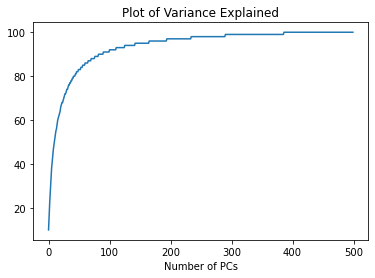

In [24]:
X_transformed = pca.fit_transform(digits_new.data.astype(float)) 
var = pca.explained_variance_ratio_.cumsum().round(2) * 100
plt.plot(var)
plt.title('Plot of Variance Explained')
plt.xlabel('Number of PCs')
plt.show()

3. Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.

In [32]:
ex99 = int(round(np.mean(np.where(var == 99))))
ex95 = int(round(np.mean(np.where(var == 95))))
ex90 = int(round(np.mean(np.where(var == 90))))
ex85 = int(round(np.mean(np.where(var == 85))))
print('Number of PC for 99%, 95%, 90%, 85%: {}, {}, {}, {}'.format(ex99, ex95, ex90, ex85))

Number of PC for 99%, 95%, 90%, 85%: 338, 153, 86, 58


4. Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.

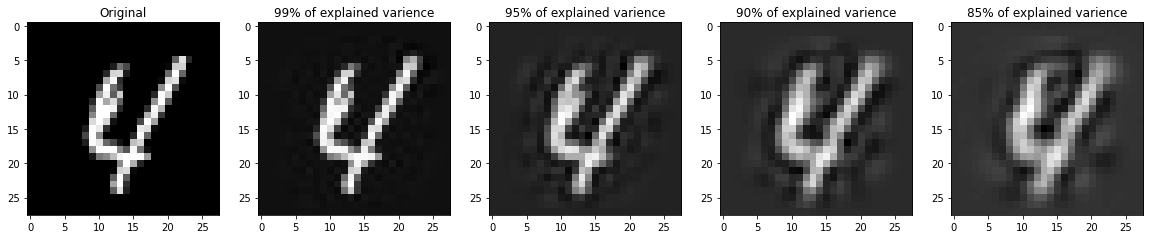

In [47]:
images_new = digits_new.data.reshape(-1, 28, 28)
i = 700
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
ax[0].imshow(images_new[i], cmap='gray')



pca99 = PCA(ex99)
X_transformed_99 = pca99.fit_transform(digits_new.data.astype(float))
X_restored_99 = pca99.inverse_transform(X_transformed_99)
ax[1].imshow(X_restored_99[i].reshape(28, 28), cmap='gray')

pca95 = PCA(ex95)
X_transformed_95 = pca95.fit_transform(digits_new.data.astype(float))
X_restored_95 = pca95.inverse_transform(X_transformed_95)
ax[2].imshow(X_restored_95[i].reshape(28, 28), cmap='gray')

pca90 = PCA(ex90)
X_transformed_90 = pca90.fit_transform(digits_new.data.astype(float))
X_restored_90 = pca90.inverse_transform(X_transformed_90)
ax[3].imshow(X_restored_90[i].reshape(28, 28), cmap='gray')

pca85 = PCA(ex85)
X_transformed_85 = pca85.fit_transform(digits_new.data.astype(float))
X_restored_85 = pca85.inverse_transform(X_transformed_85)
ax[4].imshow(X_restored_85[i].reshape(28, 28), cmap='gray')

ax[0].set_title('Original')
ax[1].set_title('99% of explained varience')
ax[2].set_title('95% of explained varience')
ax[3].set_title('90% of explained varience')
ax[4].set_title('85% of explained varience')


plt.show()